In [1]:
import numpy as np
import pandas as pd

import os
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
features = list()
with open('data/UCI HAR Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


In [3]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D, BatchNormalization,Flatten
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
# get the data from txt files to pandas dataframe
X_train = pd.read_csv('data/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
X_train.columns = features

# add subject column to the dataframe
X_train['subject'] = pd.read_csv('data/UCI HAR Dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('data/UCI HAR Dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
6534,0.278099,-0.023674,-0.104998,-0.992212,-0.94201,-0.970065,-0.993941,-0.954487,-0.978286,-0.92717,...,0.10467,0.280546,0.059516,-0.081398,0.753482,0.205794,0.999776,28,6,LAYING


In [5]:
train.shape

(7352, 564)

In [6]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('data/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
X_test.columns = features

# add subject column to the dataframe
X_test['subject'] = pd.read_csv('data/UCI HAR Dataset/test/subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('data/UCI HAR Dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
573,0.364006,-0.011985,-0.137973,0.094659,-0.196951,-0.469005,0.026364,-0.229174,-0.452109,0.406086,...,-0.596432,-0.928528,0.817049,-0.606942,-0.88852,0.115612,-0.061765,4,3,WALKING_DOWNSTAIRS


In [7]:
test.shape

(2947, 564)

In [8]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity',
       'ActivityName'],
      dtype='object', length=564)

In [9]:

print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


In [10]:
#Checking for NaN/null values
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


In [11]:
#Check for data imbalance
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

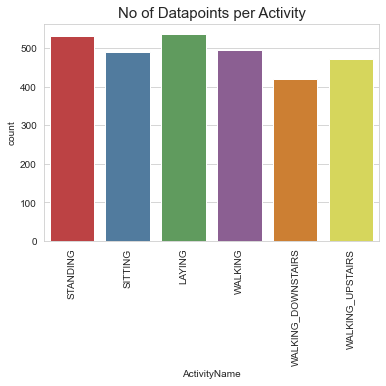

In [113]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(test.ActivityName)
plt.xticks(rotation=90)
plt.show()

In [13]:
columns = train.columns
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '_')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAcc_mean_X', 'tBodyAcc_mean_Y', 'tBodyAcc_mean_Z',
       'tBodyAcc_std_X', 'tBodyAcc_std_Y', 'tBodyAcc_std_Z', 'tBodyAcc_mad_X',
       'tBodyAcc_mad_Y', 'tBodyAcc_mad_Z', 'tBodyAcc_max_X',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

In [14]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

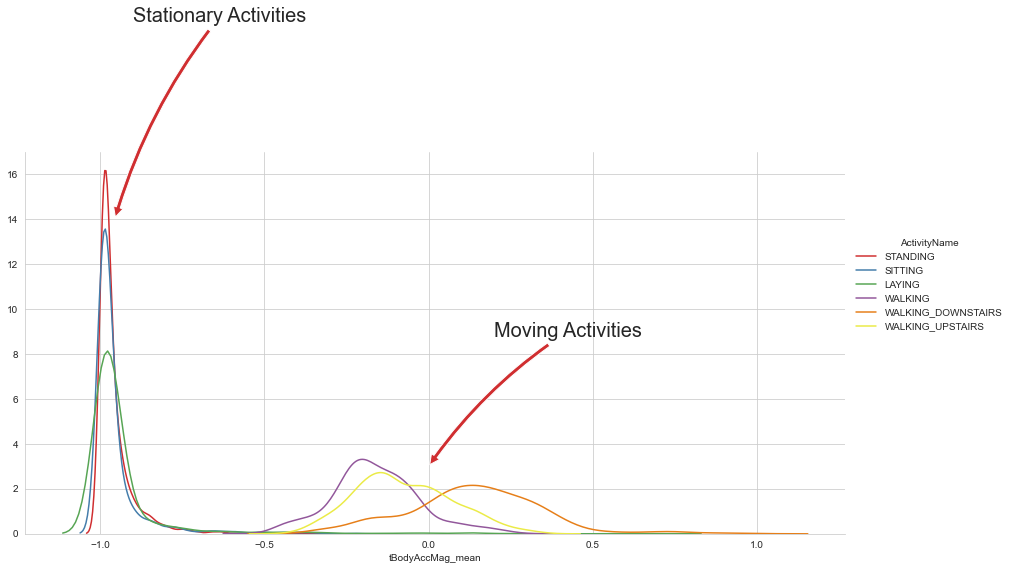

In [15]:
# Exploratory Data Analysis
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMag_mean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,14), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

In [16]:
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

In [17]:

X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

In [18]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


In [19]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

In [20]:
#Function to plot the confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
from datetime import datetime

def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

In [22]:
#Method to print the gridsearch Attributes

def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

In [23]:
# function to normalise data

def standardise(X_train,X_test):
    ss=StandardScaler().fit(X_train)
    X_train=ss.transform(X_train)
    X_test=ss.transform(X_test)
    return X_train,X_test

# # function to reduce dimensions of data
# def reduce_pca(X_train,X_test,comp):
#     X_train,X_test=standardise(X_train,X_test)
#     model =PCA()
#     model= (n_components=comp,whiten=True)
#     X_train=model.fit_transform(X_train)
#     X_test=model.transform(X_test)
#     return X_train,X_test


In [24]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [25]:
X_train,X_test=standardise(X_train,X_test)
#X_train,X_test = reduce_pca(X_train,X_test,330)


In [26]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Done 
 

training_time(HH:MM:SS.ms) - 0:00:15.371932


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.008606


---------------------
|      Accuracy      |
---------------------

    0.9545300305395318


--------------------
| Confusion Matrix |
--------------------

 [[533   0   4   0   0   0]
 [  1 430  58   0   0   2]
 [  0  14 518   0   0   0]
 [  0   0   0 493   3   0]
 [  0   0   2   6 392  20]
 [  0   0   0  23   1 447]]


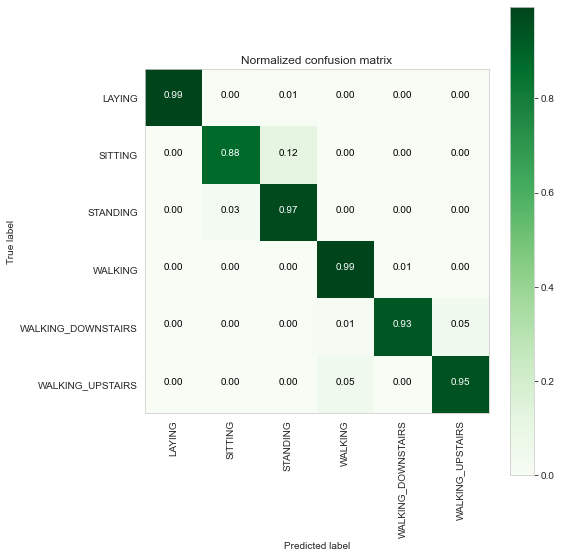

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      0.99      1.00       537
           SITTING       0.97      0.88      0.92       491
          STANDING       0.89      0.97      0.93       532
           WALKING       0.94      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.93      0.96       420
  WALKING_UPSTAIRS       0.95      0.95      0.95       471

          accuracy                           0.95      2947
         macro avg       0.96      0.95      0.95      2947
      weighted avg       0.96      0.95      0.95      2947



In [27]:
# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

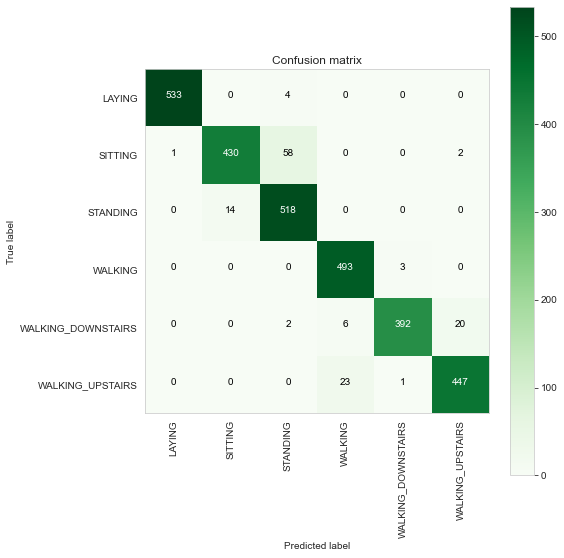

In [28]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [29]:
# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=1)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 1, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9385224967179854



In [30]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier

training the model..
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Done 
 

training_time(HH:MM:SS.ms) - 0:01:33.223844


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.009388


---------------------
|      Accuracy      |
---------------------

    0.9619952494061758


--------------------
| Confusion Matrix |
--------------------

 [[526   0  11   0   0   0]
 [  1 427  59   0   0   4]
 [  0  15 517   0   0   0]
 [  0   0   0 494   0   2]
 [  0   1   1   2 412   4]
 [  0   0   0  12   0 459]]


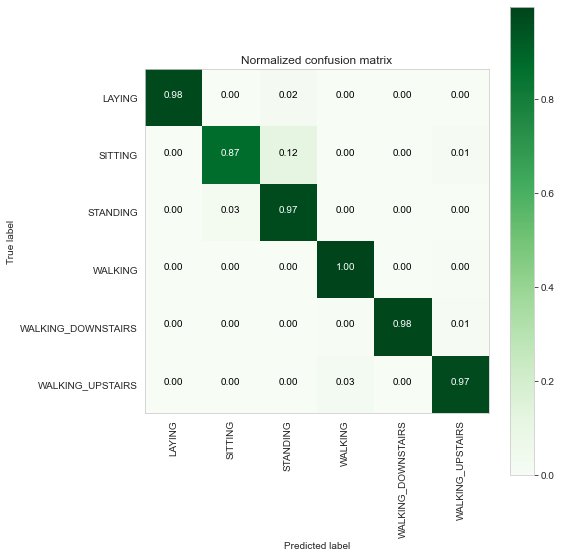

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      0.98      0.99       537
           SITTING       0.96      0.87      0.91       491
          STANDING       0.88      0.97      0.92       532
           WALKING       0.97      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.97      0.98       471

          accuracy                           0.96      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [31]:
parameters = {'C':[0.05,0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=8, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [32]:
print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=0.125, tol=5e-05)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 0.125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9407057996550081



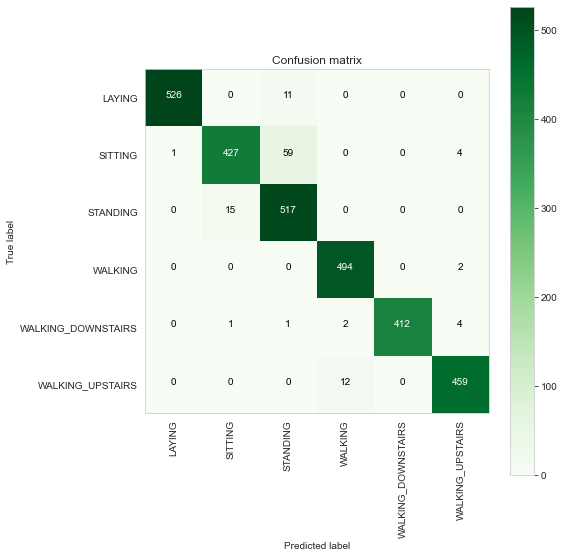

In [33]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(lr_svc_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:26.554202


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.016718


---------------------
|      Accuracy      |
---------------------

    0.838479809976247


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 400  91   0   0   0]
 [  0 113 419   0   0   0]
 [  0   0   0 470  10  16]
 [  0   0   0  49 266 105]
 [  0   0   0  86   6 379]]


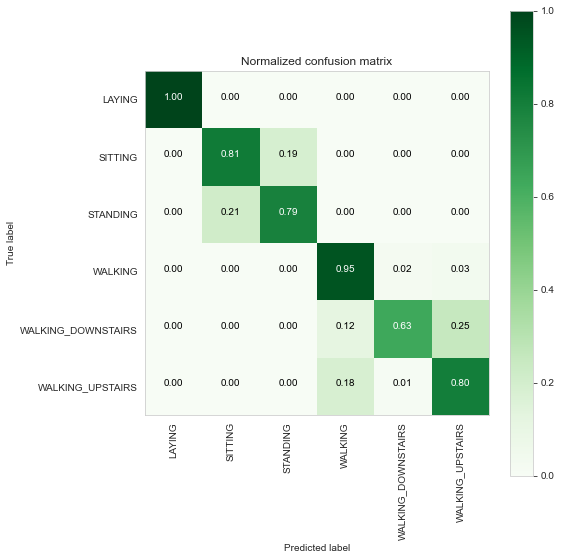

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.78      0.81      0.80       491
          STANDING       0.82      0.79      0.80       532
           WALKING       0.78      0.95      0.85       496
WALKING_DOWNSTAIRS       0.94      0.63      0.76       420
  WALKING_UPSTAIRS       0.76      0.80      0.78       471

          accuracy                           0.84      2947
         macro avg       0.85      0.83      0.83      2947
      weighted avg       0.85      0.84      0.84      2947

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(max_depth=5)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 5}

---------------------------------
|   No of CrossValidation sets

In [34]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=8)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

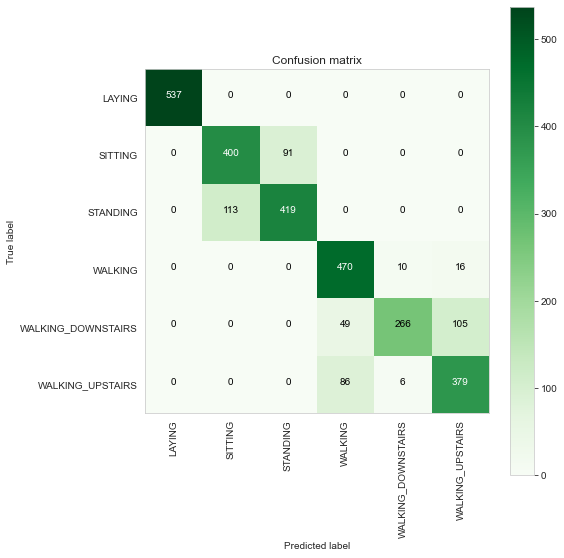

In [50]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(dt_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:15:31.008790


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.210197


---------------------
|      Accuracy      |
---------------------

    0.9314557176789956


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 440  51   0   0   0]
 [  0  40 492   0   0   0]
 [  0   0   0 489   4   3]
 [  0   0   0  21 358  41]
 [  0   0   0  35   7 429]]


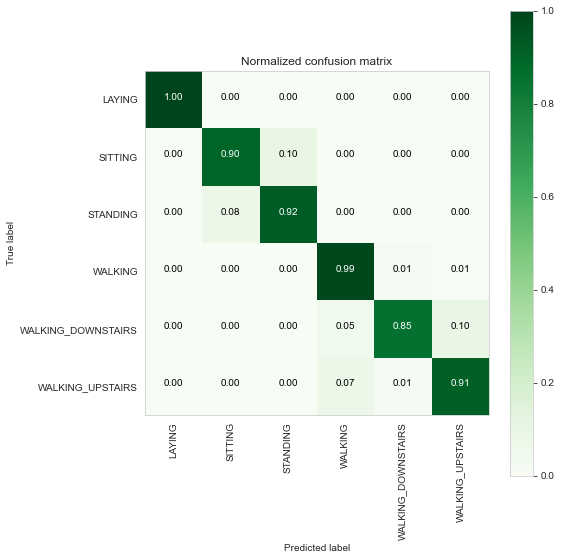

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.92      0.90      0.91       491
          STANDING       0.91      0.92      0.92       532
           WALKING       0.90      0.99      0.94       496
WALKING_DOWNSTAIRS       0.97      0.85      0.91       420
  WALKING_UPSTAIRS       0.91      0.91      0.91       471

          accuracy                           0.93      2947
         macro avg       0.93      0.93      0.93      2947
      weighted avg       0.93      0.93      0.93      2947

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(max_depth=13, n_estimators=110)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 13, 'n_estimators': 110}

-----------------------

In [35]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=8)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])

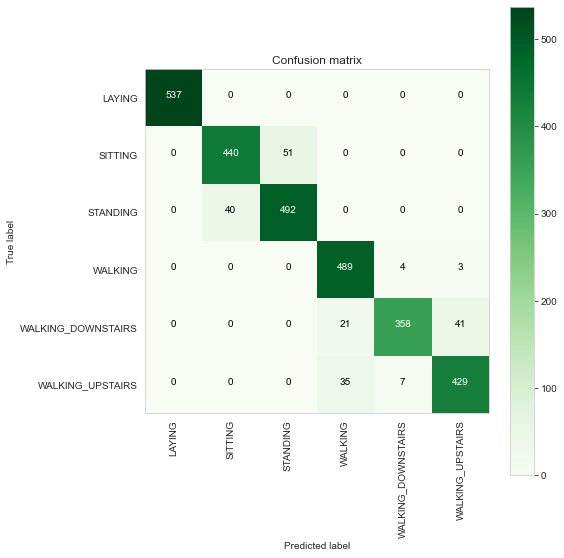

In [51]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(rfc_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [36]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))


print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 95.45%       4.547%
Linear SVC          : 96.2%       3.8% 
DecisionTree        : 83.85%      16.15% 
Random Forest       : 93.15%      6.854% 


In [37]:
#Neural Network Modelling

In [38]:

def load_file(filepath):
    dataframe = read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    loaded = dstack(loaded)
    return loaded


def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    # body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y

# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix + 'data/UCI HAR Dataset/')
    print(trainX.shape, trainy.shape)
    # load all test
    testX, testy = load_dataset_group('test', prefix + 'data/UCI HAR Dataset/')
    print(testX.shape, testy.shape)
    # zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    # one hot encode y
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    print(trainX.shape, trainy.shape, testX.shape, testy.shape)
    return trainX, trainy, testX, testy

In [115]:
testX1, testy1 = load_dataset_group('test',  'data/UCI HAR Dataset/')

In [116]:
testy1

array([[5],
       [5],
       [5],
       ...,
       [2],
       [2],
       [2]], dtype=int64)

In [39]:
trainX, trainy, testX, testy = load_dataset()

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)


In [40]:
import pydot
from keras.utils import plot_model

In [41]:
def scale_data(X_train, X_test):
    cut = int(X_train.shape[1] / 2)
    longX = X_train[:, -cut:, :]
    # flatten windows
    longX = longX.reshape((longX.shape[0] * longX.shape[1], longX.shape[2]))
    # flatten train and test
    flatTrainX = X_train.reshape((X_train.shape[0] * X_train.shape[1], X_train.shape[2]))
    flatTestX = X_test.reshape((X_test.shape[0] * X_test.shape[1], X_test.shape[2]))
    # standardize
    s = StandardScaler()
    # fit on training data
    s.fit(longX)
    # apply to training, test and validation data
    flatTrainX = s.transform(flatTrainX)
    flatTestX = s.transform(flatTestX)
    # reshape
    flatTrainX = flatTrainX.reshape((X_train.shape))
    flatTestX = flatTestX.reshape((X_test.shape))
    return flatTrainX, flatTestX

In [42]:
def plot_acc_curve(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [58]:
# fit and evaluate a model
def evaluate_LSTM_model(trainX, trainy, testX, testy):
    verbose, epochs, batch_size = 1, 30, 128
    trainX, X_val, trainy, y_val = train_test_split(trainX, trainy, test_size=0.2, random_state=1)
    n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
    model = Sequential()
    model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit network

    history = model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_data=(X_val,y_val))
    plot_acc_curve(history)
    plot_model(model, show_layer_names=False, show_shapes=True, to_file='LSTM.png')
    #model.save('/content/drive/My Drive/Colab Notebooks/LAR/LSTM.hdf5')
    # evaluate model
    _, accuracy = model.evaluate(testX, testy,batch_size=batch_size, verbose=1)
    return accuracy, model

Epoch 1/30
46/46 [==============================] - 22s 360ms/step - loss: 1.5494 - accuracy: 0.3644 - val_loss: 1.0664 - val_accuracy: 0.5547
Epoch 2/30
46/46 [==============================] - 14s 304ms/step - loss: 1.0254 - accuracy: 0.5545 - val_loss: 0.8900 - val_accuracy: 0.6356
Epoch 3/30
46/46 [==============================] - 15s 323ms/step - loss: 0.9688 - accuracy: 0.6230 - val_loss: 0.7160 - val_accuracy: 0.6975
Epoch 4/30
46/46 [==============================] - 15s 316ms/step - loss: 0.6900 - accuracy: 0.7011 - val_loss: 0.5812 - val_accuracy: 0.7784
Epoch 5/30
46/46 [==============================] - 14s 299ms/step - loss: 0.5972 - accuracy: 0.7484 - val_loss: 0.5972 - val_accuracy: 0.7301
Epoch 6/30
46/46 [==============================] - 13s 285ms/step - loss: 0.6271 - accuracy: 0.7315 - val_loss: 0.5015 - val_accuracy: 0.8022
Epoch 7/30
46/46 [==============================] - 15s 319ms/step - loss: 0.4938 - accuracy: 0.8137 - val_loss: 0.4342 - val_accuracy: 0.8423

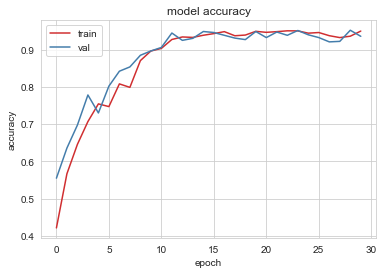

24/24 [==============================] - 3s 109ms/step - loss: 0.3763 - accuracy: 0.9006


In [103]:
res_lstm = evaluate_LSTM_model(trainX, trainy, testX, testy)

In [117]:
lab = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING']

In [118]:

def conf_mat_deep(model,testX,testY):
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    ypred = model.predict(testX)
    cm = metrics.confusion_matrix(testY.argmax(axis=1), ypred.argmax(axis=1))
    plot_confusion_matrix(cm, classes=lab)


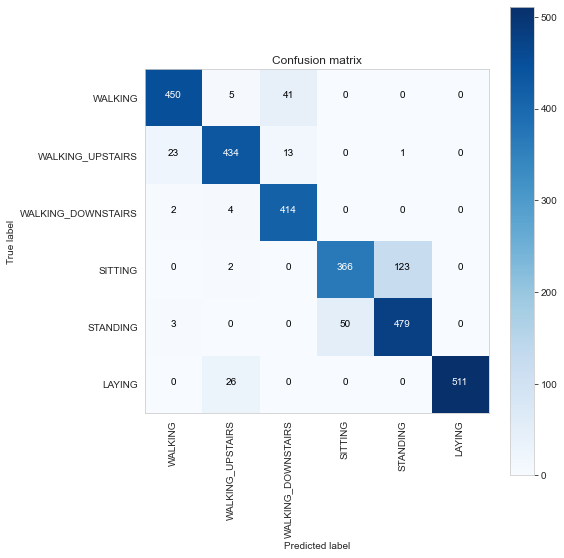

In [119]:
conf_mat_deep(res_lstm[1],testX,testy)
# ypred = score[1].predict(testX)
# #ypred = model.predict(testX)

# cm = matrix = metrics.confusion_matrix(testy.argmax(axis=1), ypred.argmax(axis=1))
# plot_confusion_matrix(cm, classes=labels)


In [105]:
def evaluate_cnn_model(trainX, trainy, testX, testy):
    verbose, epochs, batch_size = 1, 15, 32
    trainX, X_val, trainy, y_val = train_test_split(trainX, trainy, test_size=0.2, random_state=1)
    n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
    #model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.8))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    plot_model(model, show_layer_names=False, show_shapes=True, to_file='CNN.png')
    history = model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_data=(X_val,y_val))
    plot_acc_curve(history)
    _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=1)
    return accuracy, model

Epoch 1/15
184/184 [==============================] - 6s 27ms/step - loss: 0.7818 - accuracy: 0.6744 - val_loss: 0.3134 - val_accuracy: 0.9211
Epoch 2/15
184/184 [==============================] - 4s 24ms/step - loss: 0.2334 - accuracy: 0.9132 - val_loss: 0.1904 - val_accuracy: 0.9361
Epoch 3/15
184/184 [==============================] - 5s 25ms/step - loss: 0.1546 - accuracy: 0.9364 - val_loss: 0.1719 - val_accuracy: 0.9463
Epoch 4/15
184/184 [==============================] - 4s 23ms/step - loss: 0.1300 - accuracy: 0.9506 - val_loss: 0.1573 - val_accuracy: 0.9477
Epoch 5/15
184/184 [==============================] - 5s 25ms/step - loss: 0.1199 - accuracy: 0.9483 - val_loss: 0.1388 - val_accuracy: 0.9538
Epoch 6/15
184/184 [==============================] - 5s 25ms/step - loss: 0.1189 - accuracy: 0.9435 - val_loss: 0.1360 - val_accuracy: 0.9436
Epoch 7/15
184/184 [==============================] - 4s 24ms/step - loss: 0.1251 - accuracy: 0.9466 - val_loss: 0.1396 - val_accuracy: 0.9477

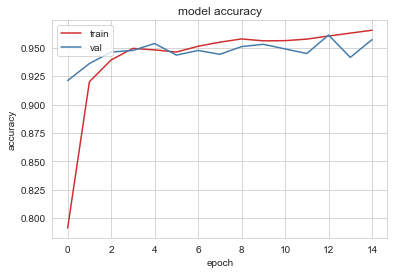

93/93 [==============================] - 1s 7ms/step - loss: 0.4471 - accuracy: 0.9060


(0.9060060977935791,
 <tensorflow.python.keras.engine.sequential.Sequential at 0x1e90950a4f0>)

In [100]:
res_cnn = evaluate_cnn_model(trainX, trainy, testX, testy)
res_cnn

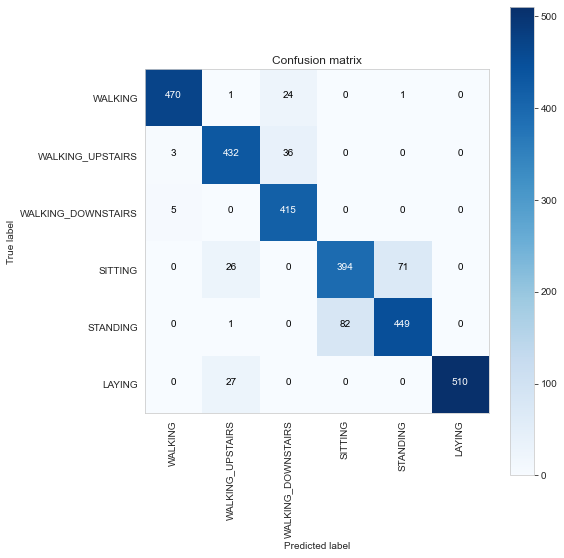

In [120]:
conf_mat_deep(res_cnn[1],testX,testy)

In [54]:
def evaluate_hybrid_model(X_train, y_train, X_test, y_test, kernel, verbose=1):
    X_train, X_test = scale_data(X_train, X_test)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

    epochs, batch_size = 15, 128
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]

    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=kernel[0], activation='relu', input_shape=(n_timesteps, n_features)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=50, kernel_size=kernel[1], activation='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling1D(pool_size=2))

    model.add(LSTM(units=60, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=65))
    model.add(Dropout(0.2))

    model.add(Dense(units=65))
    model.add(Dense(units=n_outputs, activation="softmax"))

    # Reduce the learning rate once the learning stagnates, it is good in order
    # try to scratch those last decimals of accuracy.
    reduce_lr = ReduceLROnPlateau(monitor='accuracy',
                                  factor=0.1,
                                  patience=4,
                                  verbose=verbose,
                                  min_delta=0.001,
                                  mode='max')

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    # Save an image of the model architecture
    plot_model(model, show_layer_names=False, show_shapes=True, to_file='CNN_LSTM.png')

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
              verbose=verbose, shuffle=True,
              callbacks=[reduce_lr],
             validation_data=(X_val,y_val))
    
    plot_acc_curve(history)

    _, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=verbose)
    return accuracy, history

#Kernel: (5, 5)
Epoch 1/15
41/41 [==============================] - 21s 232ms/step - loss: 0.4528 - accuracy: 0.4031 - val_loss: 0.1871 - val_accuracy: 0.7362
Epoch 2/15
41/41 [==============================] - 7s 170ms/step - loss: 0.1703 - accuracy: 0.7860 - val_loss: 0.1124 - val_accuracy: 0.8826
Epoch 3/15
41/41 [==============================] - 6s 150ms/step - loss: 0.1123 - accuracy: 0.8778 - val_loss: 0.0586 - val_accuracy: 0.9379
Epoch 4/15
41/41 [==============================] - 7s 174ms/step - loss: 0.0650 - accuracy: 0.9301 - val_loss: 0.0422 - val_accuracy: 0.9515
Epoch 5/15
41/41 [==============================] - 7s 167ms/step - loss: 0.0499 - accuracy: 0.9488 - val_loss: 0.0379 - val_accuracy: 0.9560
Epoch 6/15
41/41 [==============================] - 7s 174ms/step - loss: 0.0482 - accuracy: 0.9442 - val_loss: 0.0384 - val_accuracy: 0.9519
Epoch 7/15
41/41 [==============================] - 6s 146ms/step - loss: 0.0381 - accuracy: 0.9557 - val_loss: 0.0349 - val_accura

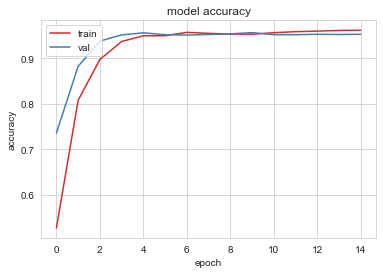

24/24 [==============================] - 1s 45ms/step - loss: 0.0839 - accuracy: 0.9162
91.6185975074768


In [60]:

kernel=(#(3, 3),
        (5,5),)
all_scores = []
#score,history = evaluate_model(trainX, trainy,testX , testy,kernel=k)

for k in kernel:
    print("#Kernel:", k)
# repeat experiment
    scores = list()
    score,his = evaluate_hybrid_model(trainX, trainy,testX , testy,kernel=k)
    score = score * 100.0
    print(score)
    scores.append(score)
    all_scores.append(scores)

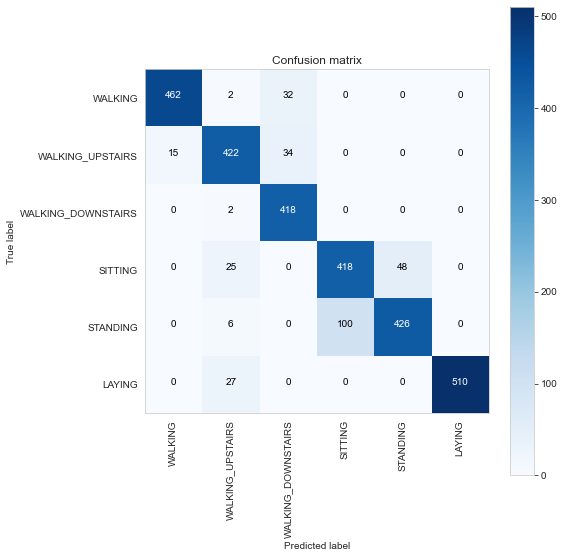

In [121]:
conf_mat_deep(score[1],testX,testy)